In [2]:
! pip install -q kaggle

In [3]:
! pip install statsmodels

In [4]:
! pip install pmdarima

In [5]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"minojsos","key":"4c61d1db040b01096a2a311efc28dd3d"}'}

In [6]:
! mkdir ~/.kaggle

In [7]:
! cp kaggle.json ~/.kaggle/

In [8]:
! chmod 600 ~/.kaggle/kaggle.json

In [9]:
! kaggle datasets download -d luqmanrumaiz/srioryzia-multivariate-rice-price-forecasting

Dataset URL: https://www.kaggle.com/datasets/luqmanrumaiz/srioryzia-multivariate-rice-price-forecasting
License(s): Community Data License Agreement - Permissive - Version 1.0
  0% 0.00/77.6k [00:00<?, ?B/s]
100% 77.6k/77.6k [00:00<00:00, 44.9MB/s]


In [12]:
! unzip srioryzia-multivariate-rice-price-forecasting.zip

Archive:  srioryzia-multivariate-rice-price-forecasting.zip
  inflating: final/imputed_processed_data.csv  
  inflating: processed/exchange_rate.csv  
  inflating: processed/fuel_prices.csv  
  inflating: processed/imputed_processed_data.csv  
  inflating: processed/monetary_aggregates.csv  
  inflating: processed/paddy_production.csv  
  inflating: processed/processed_data.csv  
  inflating: processed/processed_data_without_imp.csv  
  inflating: processed/producer_prices.csv  
  inflating: processed/retail_prices.csv  
  inflating: raw/anuradhapura_farm_gate.csv  
  inflating: raw/exchange_rate.csv   
  inflating: raw/fuel_prices.csv     
  inflating: raw/guaranteed_prices_paddy.csv  
  inflating: raw/kurunegala_farm_gate.csv  
  inflating: raw/monetary_aggregates.csv  
  inflating: raw/nadu_retail.csv     
  inflating: raw/polonnaruwa_farm_gate.csv  
  inflating: raw/total_paddy_production.csv  


In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

The dataset being used for this was obtained from kaggle which consists of Rice prices in Sri Lanka across different regions.
It provides various factors and insights, including detailed producer price data from three of the country's major rice-producing surplus districts: Polonnaruwa, Anuradhapura, and Kurunegala. Additionally, the dataset covers fuel prices, exchange rates, monetary aggregates (M1, M0, M2, M2B), retail prices in the Colombo market, and paddy production (Maha Yala) - all of which can help reveal the interplay between these variables and market indicators.

# Exploratory Data Analysis (EDA)
Load the raw dataset and perform EDA on the dataset to identify/understand patterns in the dataset.

In [13]:
fuel_prices = pd.read_csv('raw/fuel_prices.csv')
exchange_rates = pd.read_csv('raw/exchange_rate.csv')

In [14]:
paddy_production = pd.read_csv('processed/paddy_production.csv')
producer_prices = pd.read_csv('processed/producer_prices.csv')
retail_prices = pd.read_csv('processed/retail_prices.csv')

## Fuel Price

In [15]:
fuel_prices.head(5)

,Date,LAD
0,1990-03-01,9.6
1,1990-04-01,9.6
2,1990-05-01,9.6
3,1990-06-01,9.6
4,1990-07-01,9.6


In [16]:
fuel_prices['Date'] = pd.to_datetime(fuel_prices['Date'])
print(f"Minimum of Fuel Prices {fuel_prices['Date'].min()}")
print(f"Maximum of Fuel Prices {fuel_prices['Date'].max()}")

Minimum of Fuel Prices 1990-03-01 00:00:00
Maximum of Fuel Prices 2023-02-01 00:00:00


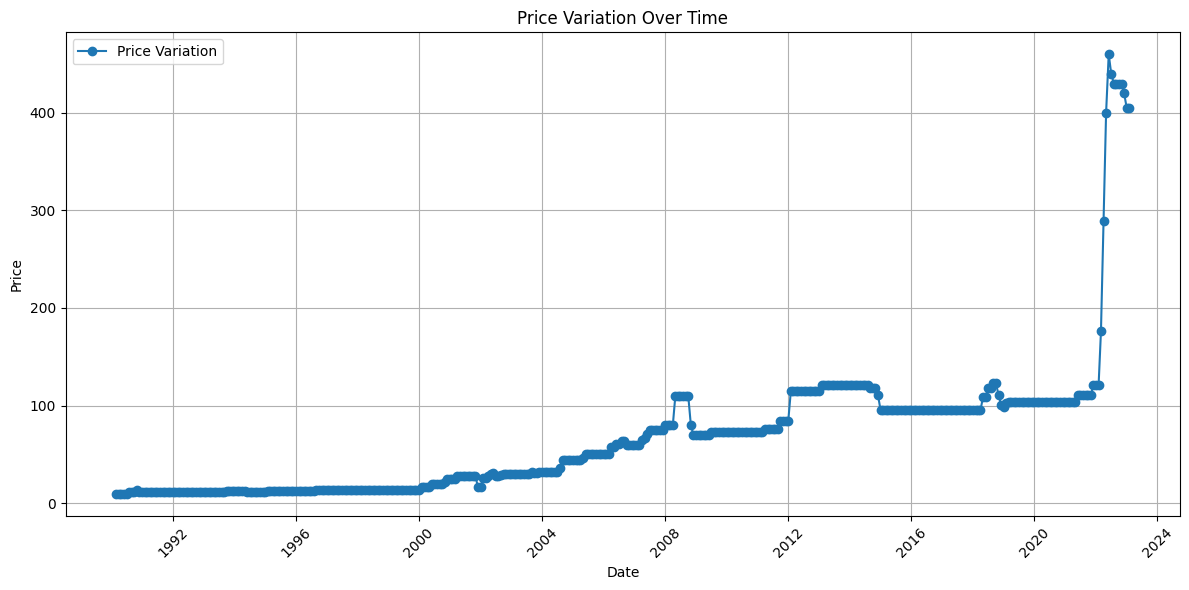

In [17]:
# Plotting the line graph
plt.figure(figsize=(12, 6))
plt.plot(fuel_prices['Date'], fuel_prices['LAD'], label='Price Variation', linestyle='-', marker='o')

# Adding labels, title, and grid
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Price Variation Over Time')
plt.grid(True)
plt.legend()

# Formatting the x-axis for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

## Exchange Rate

In [18]:
exchange_rates.head(5)

,Date,Price,Open,High,Low,Vol.,Change %
0,02/01/2023,366.0,364.000,368.500,360.50,NaN,-0.41%
1,01/01/2023,367.5,367.500,369.000,360.50,NaN,0.00%
2,12/01/2022,367.5,368.500,370.380,362.00,NaN,-0.27%
3,11/01/2022,368.5,365.500,370.500,360.50,NaN,1.52%
4,10/01/2022,363.0,365.495,370.635,355.78,NaN,-0.68%


In [19]:
exchange_rates['Date'] = pd.to_datetime(exchange_rates['Date'])

In [20]:
print(f"Minimum of Exchange Rate: {exchange_rates['Date'].min()}")
print(f"Maximum of Exchange Rate: {exchange_rates['Date'].max()}")

Minimum of Exchange Rate: 1996-01-01 00:00:00
Maximum of Exchange Rate: 2023-02-01 00:00:00


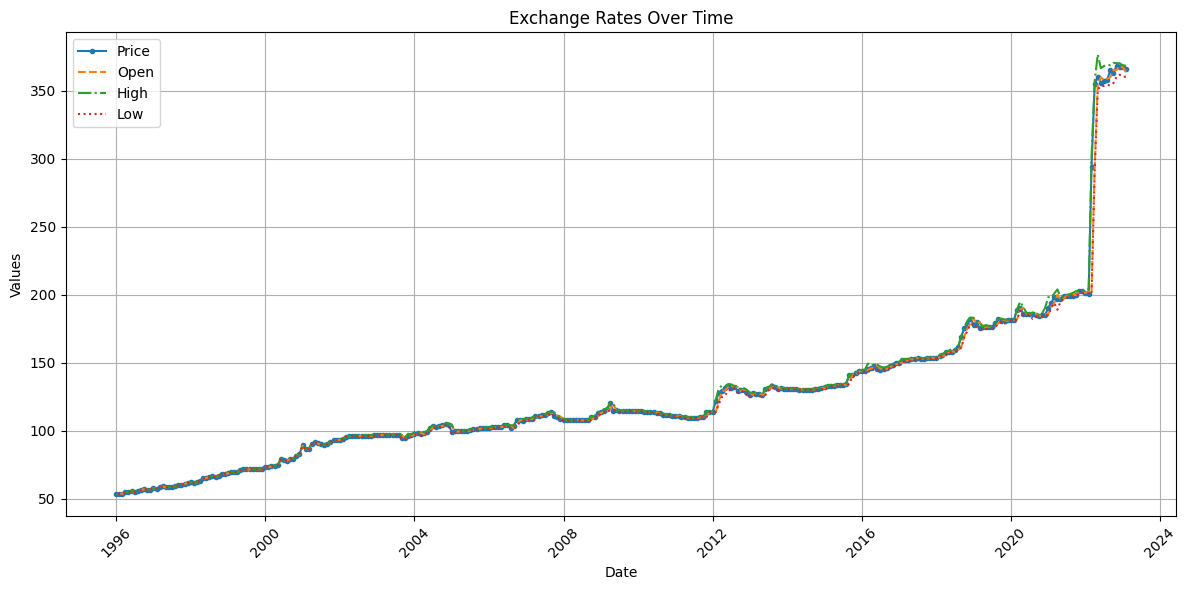

In [21]:
# Plotting the line graph
plt.figure(figsize=(12, 6))

# Plot each column
plt.plot(exchange_rates['Date'], exchange_rates['Price'], label='Price', linestyle='-', marker='.')
plt.plot(exchange_rates['Date'], exchange_rates['Open'], label='Open', linestyle='--')
plt.plot(exchange_rates['Date'], exchange_rates['High'], label='High', linestyle='-.')
plt.plot(exchange_rates['Date'], exchange_rates['Low'], label='Low', linestyle=':')

# Adding labels, title, legend, and grid
plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Exchange Rates Over Time')
plt.legend()
plt.grid(True)

# Formatting the x-axis for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

## Paddy Production

In [22]:
paddy_production.head(20)

,date,production,production_total
0,1996-01-01,1333.6,2065.1
1,1996-02-01,1333.6,2065.1
2,1996-03-01,1333.6,2065.1
3,1996-04-01,1333.6,2065.1
4,1996-05-01,731.5,2065.1
5,1996-06-01,731.5,2065.1
6,1996-07-01,731.5,2065.1
7,1996-08-01,731.5,2065.1
8,1996-09-01,731.5,2065.1
9,1996-10-01,1333.6,2065.1


In [23]:
paddy_production['date'] = pd.to_datetime(paddy_production['date'])
print(f"Minimum of Paddy Production: {paddy_production['date'].min()}")
print(f"Maximum of Paddy Production: {paddy_production['date'].max()}")

Minimum of Paddy Production: 1996-01-01 00:00:00
Maximum of Paddy Production: 2022-12-01 00:00:00


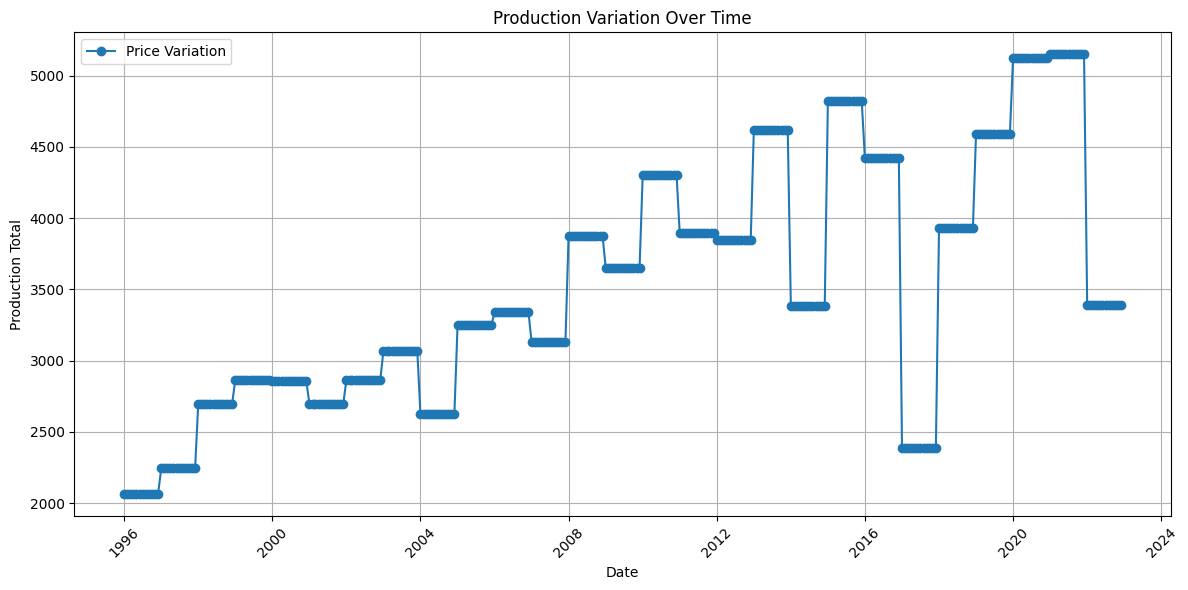

In [24]:
# Plotting the line graph
plt.figure(figsize=(12, 6))
plt.plot(paddy_production['date'], paddy_production['production_total'], label='Price Variation', linestyle='-', marker='o')

# Adding labels, title, and grid
plt.xlabel('Date')
plt.ylabel('Production Total')
plt.title('Production Variation Over Time')
plt.grid(True)
plt.legend()

# Formatting the x-axis for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

## Producer Price

In [25]:
producer_prices.head(5)

,date,anuradhapura_producer_price,kurunegala_producer_price,polonnaruwa_producer_price
0,1996-01-01,7.75,7.90,8.18
1,1996-02-01,8.17,8.26,8.76
2,1996-03-01,7.95,7.85,7.99
3,1996-04-01,8.25,8.01,8.29
4,1996-05-01,8.38,8.50,8.34


In [26]:
producer_prices['date'] = pd.to_datetime(producer_prices['date'])
print(f"Minimum of Paddy Production: {producer_prices['date'].min()}")
print(f"Maximum of Paddy Production: {producer_prices['date'].max()}")

Minimum of Paddy Production: 1996-01-01 00:00:00
Maximum of Paddy Production: 2022-12-01 00:00:00


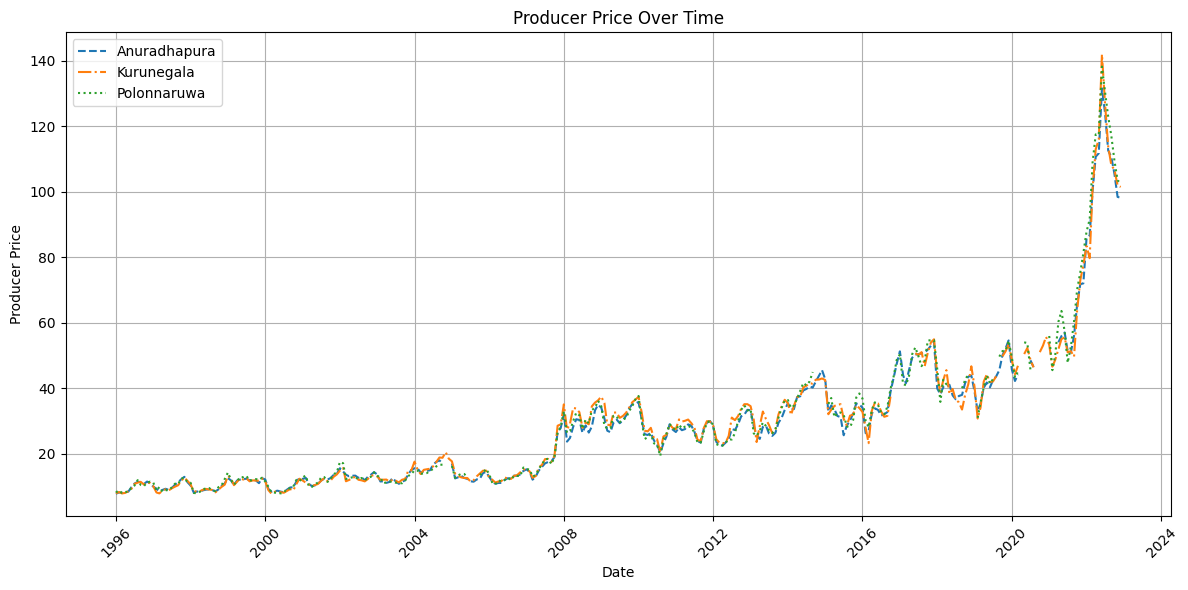

In [27]:
# Plotting the line graph
plt.figure(figsize=(12, 6))

# Plot each column
plt.plot(producer_prices['date'], producer_prices['anuradhapura_producer_price'], label='Anuradhapura', linestyle='--')
plt.plot(producer_prices['date'], producer_prices['kurunegala_producer_price'], label='Kurunegala', linestyle='-.')
plt.plot(producer_prices['date'], producer_prices['polonnaruwa_producer_price'], label='Polonnaruwa', linestyle=':')

# Adding labels, title, legend, and grid
plt.xlabel('Date')
plt.ylabel('Producer Price')
plt.title('Producer Price Over Time')
plt.legend()
plt.grid(True)

# Formatting the x-axis for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

## Retail Price

In [28]:
retail_prices.head(5)

,date,price
0,1996-01-01,18.07
1,1996-02-01,18.70
2,1996-03-01,18.49
3,1996-04-01,18.52
4,1996-05-01,19.02


In [29]:
retail_prices['date'] = pd.to_datetime(retail_prices['date'])
print(f"Minimum of Paddy Production: {retail_prices['date'].min()}")
print(f"Maximum of Paddy Production: {retail_prices['date'].max()}")

Minimum of Paddy Production: 1996-01-01 00:00:00
Maximum of Paddy Production: 2022-12-01 00:00:00


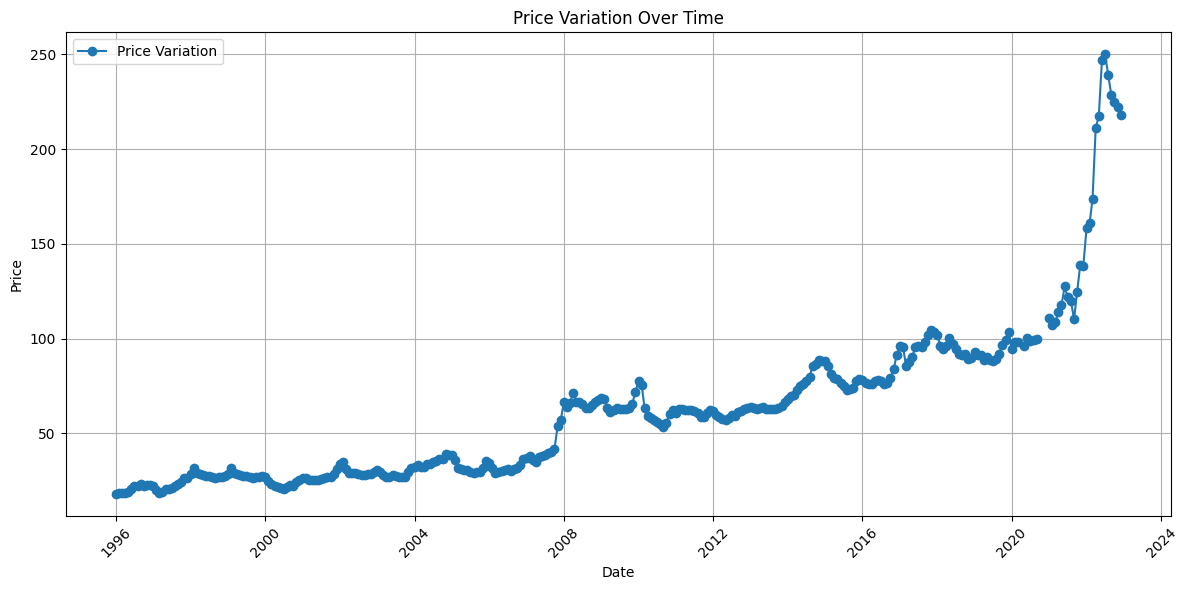

In [30]:
# Plotting the line graph
plt.figure(figsize=(12, 6))
plt.plot(retail_prices['date'], retail_prices['price'], label='Price Variation', linestyle='-', marker='o')

# Adding labels, title, and grid
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Price Variation Over Time')
plt.grid(True)
plt.legend()

# Formatting the x-axis for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

# Data Processing and Model Building

In [31]:
df = pd.read_csv('final/imputed_processed_data.csv')

In [32]:
df.head(5)

,date,price,anuradhapura_producer_price,kurunegala_producer_price,polonnaruwa_producer_price,production,production_total,exchange_rate,fuel_price,m0,m2,m1,m2b
0,1996-01-01,18.07,7.75,7.90,8.18,1333.6,2065.1,53.685,12.4,77071,228090,73783,260481
1,1996-02-01,18.70,8.17,8.26,8.76,1333.6,2065.1,53.685,12.4,79586,234199,77440,269496
2,1996-03-01,18.49,7.95,7.85,7.99,1333.6,2065.1,53.685,12.4,82915,239178,81796,272552
3,1996-04-01,18.52,8.25,8.01,8.29,1333.6,2065.1,54.735,12.4,80873,241893,79478,278425
4,1996-05-01,19.02,8.38,8.50,8.34,731.5,2065.1,54.950,12.4,83410,242072,76620,277365


In [33]:
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

## ARIMA
AutoRegressive Integrated Moving Average. Statistical model for analyzing and forecasting univariate time-series data. It focuses on capturing non-seasonal patterns in data. Uses the following properties to do so:
* Autoregressive : Uses the dependency between an observation and its previous values (lags). The parameter 𝑝. p determines how many lagged values are considered.
* Differencing : Makes the time series stationary by removing trends. The parameter 𝑑. d specifies the number of differencing steps needed to stabilize the series
* Moving Average (MA) : Accounts for the relationship between an observation and the residual errors from a moving average model applied to previous observations. The parameter 𝑞. q determines the number of lagged forecast errors included.

In [34]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split

# Target variable
y = df['anuradhapura_producer_price']

# Use train_test_split from scikit-learn
train, test = train_test_split(y, test_size=0.2, shuffle=False)

# ------------------------
# Fit ARIMA Model
# ------------------------
# Define ARIMA model (non-seasonal)
arima_model = ARIMA(train, order=(1, 1, 1))  # Adjust (p, d, q) based on your data
arima_fitted = arima_model.fit()

# Forecast with ARIMA
arima_forecast = arima_fitted.forecast(steps=len(test))

# Print model summary
print(arima_fitted.summary())

# Evaluate ARIMA
arima_mae = mean_absolute_error(test, arima_forecast)
arima_mse = mean_squared_error(test, arima_forecast)
arima_rmse = np.sqrt(arima_mse)
arima_mape = np.mean(np.abs((test - arima_forecast) / test)) * 100

print("\nARIMA Model Performance:")
print(f"MAE: {arima_mae}")
print(f"MSE: {arima_mse}")
print(f"RMSE: {arima_rmse}")
print(f"MAPE: {arima_mape}%")

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                    SARIMAX Results                                    
Dep. Variable:     anuradhapura_producer_price   No. Observations:                  259
Model:                          ARIMA(1, 1, 1)   Log Likelihood                -550.605
Date:                         Fri, 29 Nov 2024   AIC                           1107.211
Time:                                 04:09:25   BIC                           1117.870
Sample:                             01-01-1996   HQIC                          1111.497
                                  - 07-01-2017                                         
Covariance Type:                           opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1243      0.212     -0.585      0.559      -0.541       0.292
ma.L1          0.3447      0.194      1.774      0.076     

## SARIMA
Seasonal ARIMA extends ARIMA to account for seasonal patterns in time series data. It incorporates a seasonal component alongside the non-seasonal ARIMA components. The seasonal component is defined by:
* P: Seasonal autoregressive order.
* D: Seasonal differencing order.
* Q: Seasonal moving average order.
* s: Length of the seasonal cycle (e.g., 𝑠=12. s=12 for monthly data with yearly seasonality).

ADF Statistic: 0.0703826544777667
p-value: 0.9639798286206795
The data is not stationary; consider differencing.


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:        anuradhapura_producer_price   No. Observations:                  259
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -465.564
Date:                            Fri, 29 Nov 2024   AIC                            941.129
Time:                                    04:10:27   BIC                            958.362
Sample:                                01-01-1996   HQIC                           948.079
                                     - 07-01-2017                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6879      0.654      1.051      0.293      -0.594       1.970
ma.L1         -0.6527      0.686   

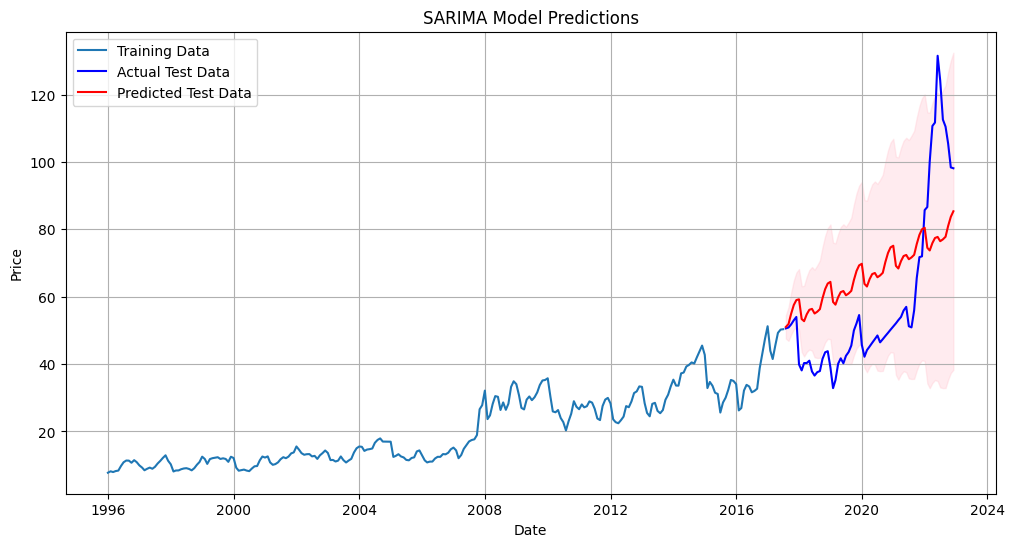

In [37]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from sklearn.model_selection import train_test_split

# Target variable
y = df['anuradhapura_producer_price']

# Use train_test_split from scikit-learn
train, test = train_test_split(y, test_size=0.2, shuffle=False)

# Check stationarity of the training set
adf_test = adfuller(train.dropna())
print(f"ADF Statistic: {adf_test[0]}")
print(f"p-value: {adf_test[1]}")

if adf_test[1] > 0.05:
    print("The data is not stationary; consider differencing.")
else:
    print("The data is stationary.")

# Fit the SARIMA model
model = SARIMAX(
    train,
    order=(1, 1, 1),             # ARIMA terms (p, d, q)
    seasonal_order=(1, 1, 1, 12),  # Seasonal terms (P, D, Q, s)
    enforce_stationarity=False,
    enforce_invertibility=False
)
sarima_model = model.fit()

# Print model summary
print(sarima_model.summary())

# Predict on the test set
sarima_forecast = sarima_model.get_forecast(steps=len(test))
sarima_predictions = sarima_forecast.predicted_mean

# Calculate confidence intervals
forecast_ci = sarima_forecast.conf_int()

# Calculate evaluation metrics
mae = mean_absolute_error(test, sarima_predictions)
mse = mean_squared_error(test, sarima_predictions)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((test - sarima_predictions) / test)) * 100

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAPE: {mape}%")

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(train, label='Training Data')
plt.plot(test, label='Actual Test Data', color='blue')
plt.plot(sarima_predictions, label='Predicted Test Data', color='red')
plt.fill_between(test.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='pink', alpha=0.3)
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('SARIMA Model Predictions')
plt.legend()
plt.grid(True)
plt.show()

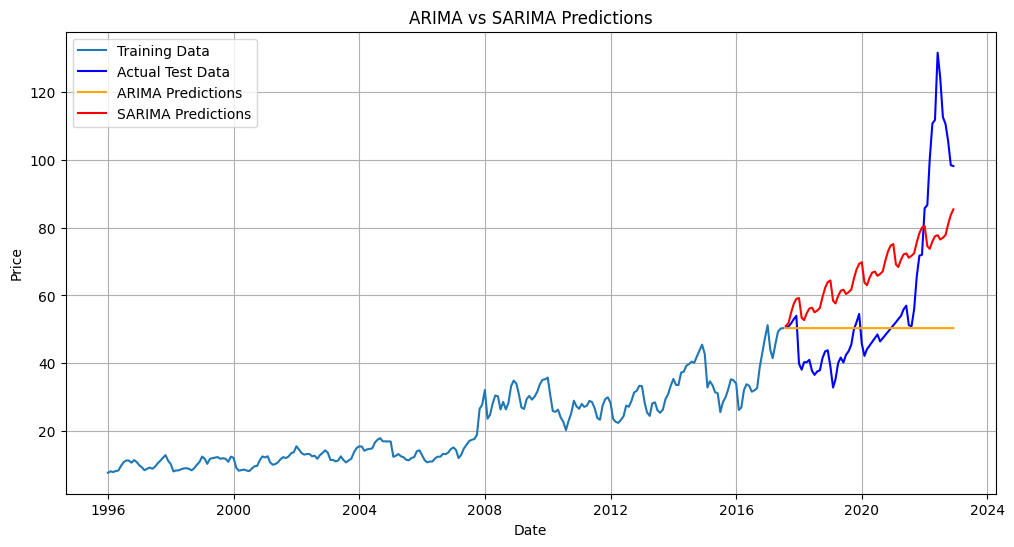

In [38]:
# ------------------------
# Compare Models Visually
# ------------------------
plt.figure(figsize=(12, 6))
plt.plot(train, label='Training Data')
plt.plot(test, label='Actual Test Data', color='blue')
plt.plot(test.index, arima_forecast, label='ARIMA Predictions', color='orange')
plt.plot(test.index, sarima_predictions, label='SARIMA Predictions', color='red')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('ARIMA vs SARIMA Predictions')
plt.legend()
plt.grid(True)
plt.show()

It is evident from the above and based on the theory that SARIMA performs better than ARIMA. This is because the data actually does contain seasonal trends which SARIMA can take into account. But the price prediction does not seem to be as accurate as it can be. This is due to certain external factors. Since Sri Lanka was hit by an economic crisis, there is a sharp increase in prices around 2021 - 2022 which the model is not capable of predicting. We need to further finetune the model to see if we can get closer to the actual price before these anomalous levels are reached.<br>
Although use an alternative approach such as Boosting Algorithm or LSTM to understand if they can outperform SARIMA.